In [59]:
import datetime
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.arima_model import ARMA,ARIMA
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [2]:
w_data = pd.read_csv('data4.csv', index_col='year', parse_dates=True)

In [3]:
w_data = w_data.loc[:'2015-12-01']

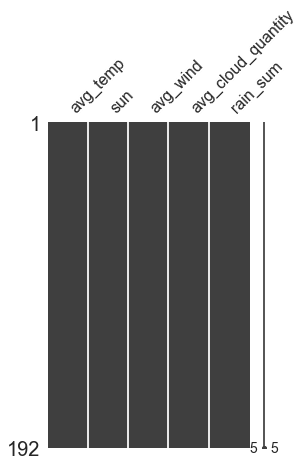

In [4]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(4,6))

In [5]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.2900637663836467, 0.015328508913554114, 13, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 560.484979923089)
(-5.616589192480479, 1.170606324354971e-06, 5, 186, {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}, 1800.7981370591356)
(-1.9690874586506262, 0.3002894367029275, 13, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 133.76320669439235)
(-7.969310934484765, 2.8091012202364616e-12, 9, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, 2119.8995652066324)
(-2.8600582212346004, 0.05019373726663235, 12, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 498.0715668537154)


# Since P-value is not less than 0.01 , these vars are 単位根

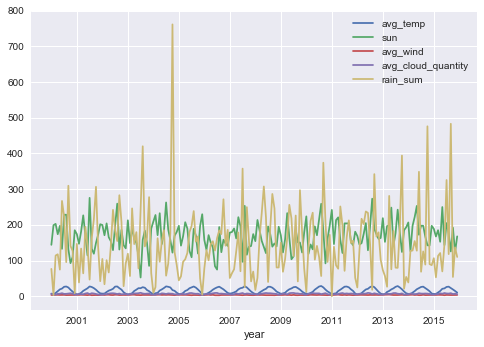

In [6]:
#原系列のplot
w_data.plot()

In [7]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean().dropna()
temp_diff = temp_data.diff().dropna()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean().dropna()
sun_diff = sun_data.diff().dropna()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean().dropna()
wind_diff = wind_data.diff().dropna()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean().dropna()
rain_diff = rain_data.diff().dropna()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean().dropna()
cloud_diff = cloud_data.diff().dropna()

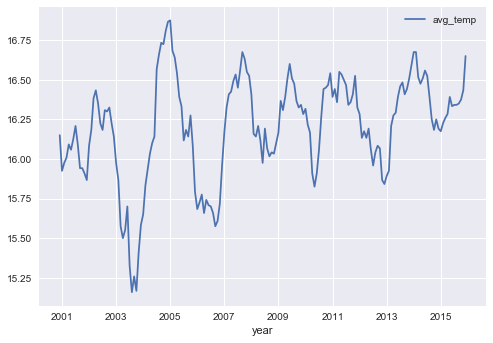

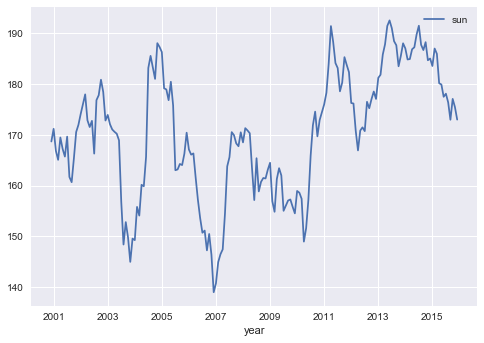

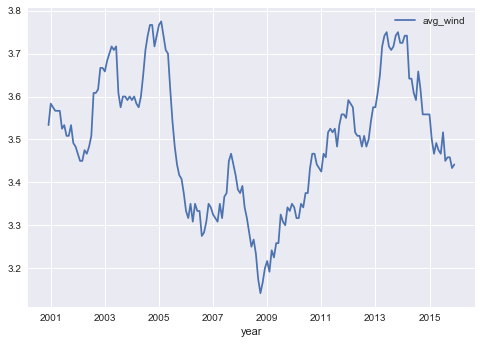

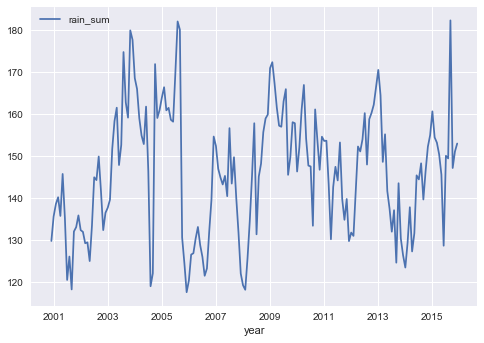

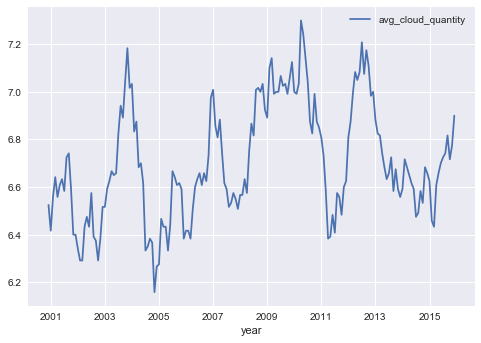

In [8]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

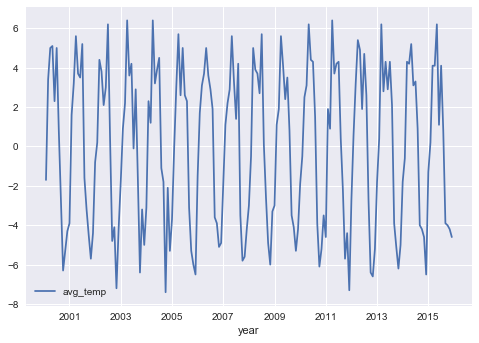

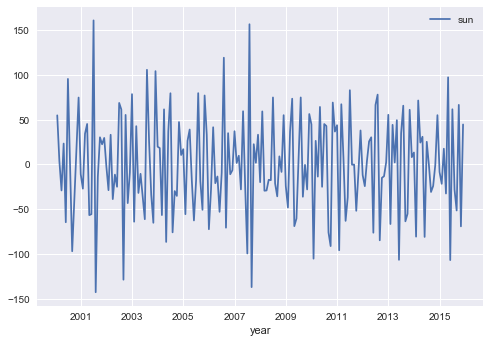

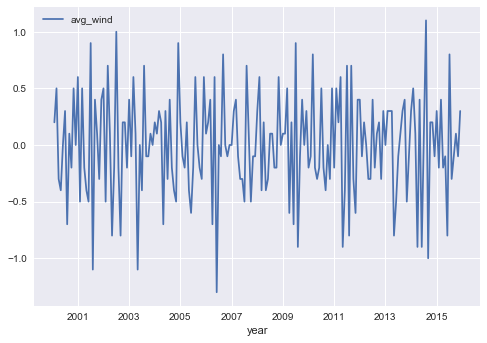

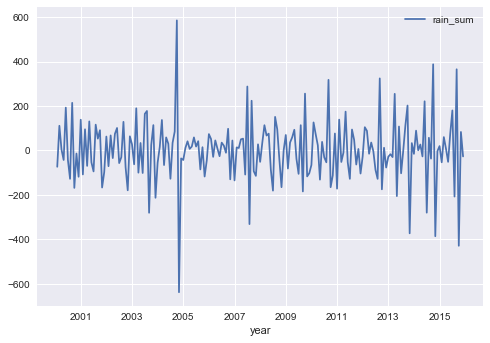

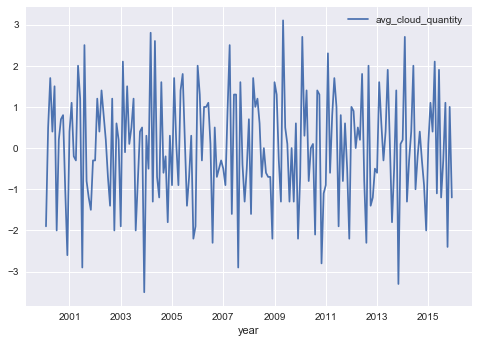

In [9]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程なので、単位根過程として捉える

In [10]:
diff_data = pd.concat([temp_diff,sun_diff,wind_diff,rain_diff,cloud_diff],axis=1)

In [11]:
#差分系列をADF検定
print (st.adfuller(temp_diff['avg_temp'].values.ravel()))
print (st.adfuller(sun_diff['sun'].values.ravel()))
print (st.adfuller(wind_diff['avg_wind'].values.ravel()))
print (st.adfuller(rain_diff['rain_sum'].values.ravel()))
print (st.adfuller(cloud_diff['avg_cloud_quantity'].values.ravel()))

(-14.539882507213544, 5.166437389404259e-27, 10, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 565.3020708815486)
(-7.518328327120599, 3.849946412942869e-11, 10, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 1801.6282255373058)
(-12.10730820681971, 1.9554655283788218e-22, 10, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 135.59317233937634)
(-9.35432077163203, 8.136352482873382e-16, 12, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 2127.3578049228154)
(-10.686799428742827, 3.814864619840895e-19, 11, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 502.1098189982017)


# 単位根なので、差分系列同士で相関関係を確認する!

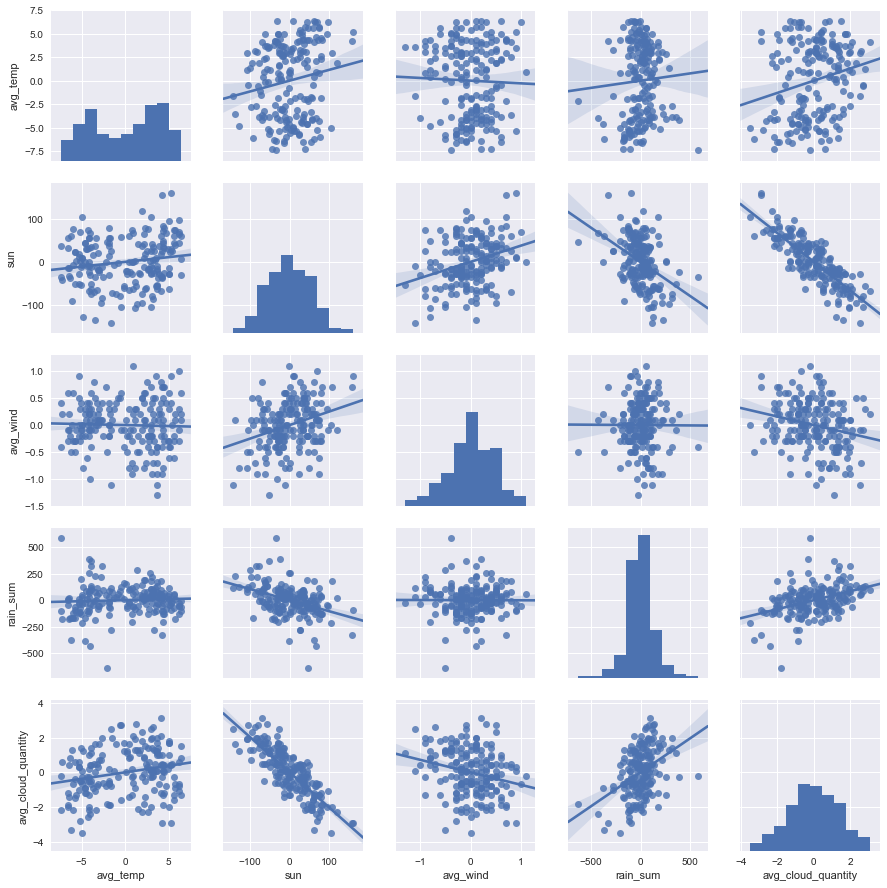

In [12]:
sns.pairplot(diff_data,kind='reg')

In [13]:
correlation_matrix = np.corrcoef(diff_data.transpose())

In [14]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

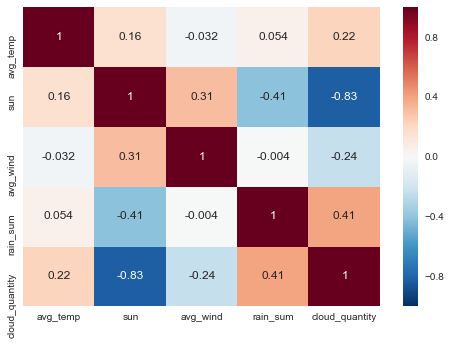

In [15]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

# Cloud quantityは日差しとか、気温とかとあまりにも相関するからバイバイする

In [16]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)
diff_data = diff_data.drop(['avg_cloud_quantity'],axis=1)

# 横浜市のデータを読み込む！

# うまく書けなかった。。
num=2000
df = pd.DataFrame()

for i in range (15):
    df = df.append(pd.read_excel('yoko_econ.xlsx',sheetname=2016))
    num += 1

In [17]:
dat2000 = pd.read_excel('yoko_econ.xlsx',sheetname='2000').T.drop(['平均'],axis=0).reset_index()
dat2001 = pd.read_excel('yoko_econ.xlsx',sheetname='2001').T.drop(['平均'],axis=0).reset_index()
dat2002 = pd.read_excel('yoko_econ.xlsx',sheetname='2002').T.drop(['平均'],axis=0).reset_index()
dat2003 = pd.read_excel('yoko_econ.xlsx',sheetname='2003').T.drop(['平均'],axis=0).reset_index()
dat2004 = pd.read_excel('yoko_econ.xlsx',sheetname='2004').T.drop(['平均'],axis=0).reset_index()
dat2005 = pd.read_excel('yoko_econ.xlsx',sheetname='2005').T.drop(['平均'],axis=0).reset_index()
dat2006 = pd.read_excel('yoko_econ.xlsx',sheetname='2006').T.drop(['平均'],axis=0).reset_index()
dat2007 = pd.read_excel('yoko_econ.xlsx',sheetname='2007').T.drop(['平均'],axis=0).reset_index()
dat2008 = pd.read_excel('yoko_econ.xlsx',sheetname='2008').T.drop(['平均'],axis=0).reset_index()
dat2009 = pd.read_excel('yoko_econ.xlsx',sheetname='2009').T.drop(['平均'],axis=0).reset_index()
dat2010 = pd.read_excel('yoko_econ.xlsx',sheetname='2010').T.drop(['平均'],axis=0).reset_index()
dat2011 = pd.read_excel('yoko_econ.xlsx',sheetname='2011').T.drop(['平均'],axis=0).reset_index()
dat2012 = pd.read_excel('yoko_econ.xlsx',sheetname='2012').T.drop(['平均'],axis=0).reset_index()
dat2013 = pd.read_excel('yoko_econ.xlsx',sheetname='2013').T.drop(['平均'],axis=0).reset_index()
dat2014 = pd.read_excel('yoko_econ.xlsx',sheetname='2014').T.drop(['平均'],axis=0).reset_index()
dat2015 = pd.read_excel('yoko_econ.xlsx',sheetname='2015').T.drop(['平均'],axis=0).reset_index()
#dat2016 = pd.read_excel('yoko_econ.xlsx',sheetname='2016').T.drop(['平均'],axis=0).reset_index()
#dat2016は平均値をもたないよ（）

/Users/Taishi/anaconda/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [79]:
#縦型のデータに突合する
dat = pd.concat([dat2000,dat2001,dat2002,dat2003,dat2004,dat2005,dat2006,dat2007,dat2008,dat2009,dat2010,dat2011,dat2012,dat2013,dat2014,dat2015],axis=0)

In [80]:
tar_data = dat.set_index('index').loc[:,['消費支出','食料','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教育','教養娯楽','その他の消費支出']]

In [81]:
##各移動平均と差分系列を取得
#消費
consumption_data = tar_data.loc[:,['消費支出']]
consumption_moving_avg = consumption_data.rolling(window=12).mean().dropna()
consumption_diff = consumption_data.diff().dropna().dropna()
#食料
food_data = tar_data.loc[:,['食料']]
food_moving_avg = food_data.rolling(window=12).mean().dropna()
food_diff = food_data.diff().dropna()
#住居
estate_data = tar_data.loc[:,['住居']]
estate_moving_avg = estate_data.rolling(window=12).mean().dropna()
estate_diff = estate_data.diff().dropna()
#光熱、水道
utility_data = tar_data.loc[:,['光熱・水道']]
utility_moving_avg = utility_data.rolling(window=12).mean().dropna()
utility_diff = utility_data.diff().dropna()
#家具・家事用品
furniture_data = tar_data.loc[:,['家具・家事用品']]
furniture_moving_avg = furniture_data.rolling(window=12).mean().dropna()
furniture_diff = furniture_data.diff().dropna()
#被服及び履物
cloth_data = tar_data.loc[:,['被服及び履物']]
cloth_moving_avg = cloth_data.rolling(window=12).mean().dropna()
cloth_diff = cloth_data.diff().dropna()
#保健医療
medical_data = tar_data.loc[:,['保健医療']]
medical_moving_avg = medical_data.rolling(window=12).mean().dropna()
medical_diff = medical_data.diff().dropna()
#風量
com_data = tar_data.loc[:,['交通・通信']]
com_moving_avg = com_data.rolling(window=12).mean().dropna()
com_diff = com_data.diff().dropna()
#教育
edu_data = tar_data.loc[:,['教育']]
edu_moving_avg = edu_data.rolling(window=12).mean().dropna()
edu_diff = edu_data.diff().dropna()
#雲量
edu_fun_data = tar_data.loc[:,['教養娯楽']]
edu_fun_moving_avg = edu_fun_data.rolling(window=12).mean().dropna()
edu_fun_diff = edu_fun_data.diff().dropna()

In [82]:
#原系列に対するADF検定
print (st.adfuller(tar_data['消費支出'].values.ravel()))
print (st.adfuller(tar_data['食料'].values.ravel()))
print (st.adfuller(tar_data['住居'].values.ravel()))
print (st.adfuller(tar_data['光熱・水道'].values.ravel()))
print (st.adfuller(tar_data['家具・家事用品'].values.ravel()))
print (st.adfuller(tar_data['被服及び履物'].values.ravel()))
print (st.adfuller(tar_data['保健医療'].values.ravel()))
print (st.adfuller(tar_data['交通・通信'].values.ravel()))
print (st.adfuller(tar_data['教育'].values.ravel()))
print (st.adfuller(tar_data['教養娯楽'].values.ravel()))

(-1.8142038948570183, 0.3734330038095893, 11, 180, {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}, 4069.5035305453284)
(-2.8598647489026443, 0.050218207064792124, 13, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 3074.4091909200088)
(-5.786426110743261, 4.987099498973615e-07, 2, 189, {'1%': -3.4654311561944873, '5%': -2.8769570530458792, '10%': -2.574988319755886}, 3669.275970009311)
(-4.0662669702101875, 0.0011006248966932929, 13, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 3083.2184115307628)
(-5.024454015795098, 1.984843148415581e-05, 9, 374, {'1%': -3.4479562840494475, '5%': -2.869299109917524, '10%': -2.57090345105665}, 6703.186418351657)
(-3.5451502867737474, 0.006900487688402369, 11, 372, {'1%': -3.4480516066132636, '5%': -2.869340997473759, '10%': -2.5709257824604}, 6778.341365759103)
(-11.278548168300956, 1.4756880765410396e-20, 0, 191, {'1%': -3.465058702600837, 

In [145]:
tar_data.columns = [
    'consumption'
    ,'food'
    ,'estate'
    ,'utility'
    ,'furniture'
    ,'furniture_2'
    ,'cloth'
    ,'cloth_2'
    ,'medical'
    ,'telecom'
    ,'education'
    ,'edu_fun'
    ,'edu_fun_2'
    ,'else'
]

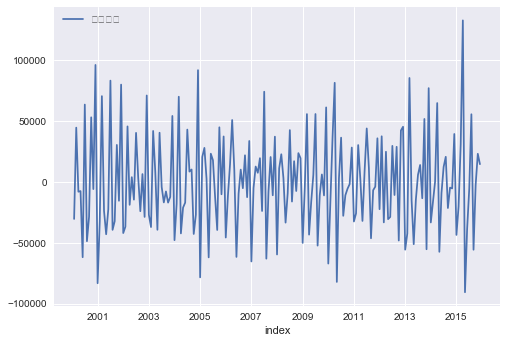

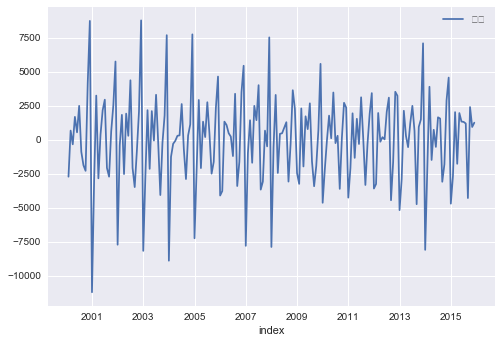

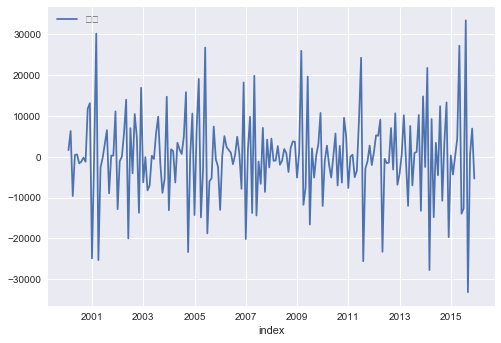

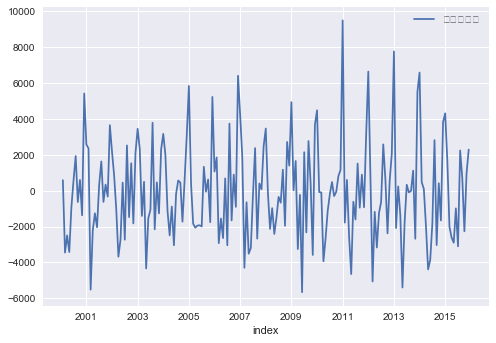

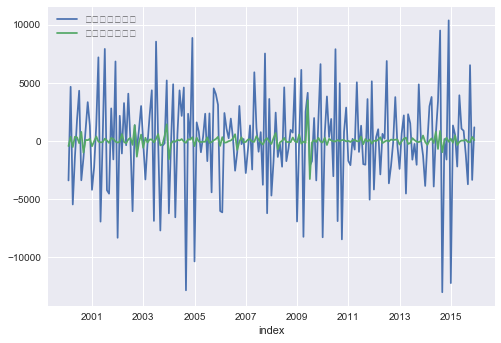

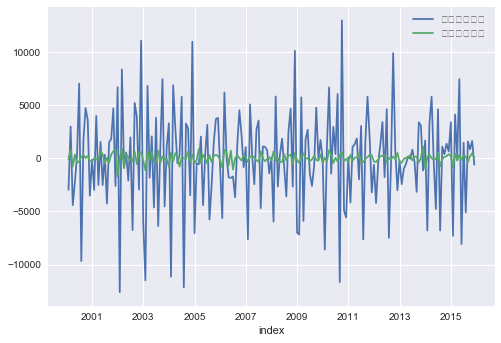

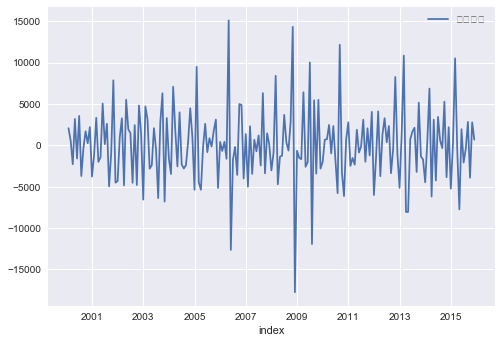

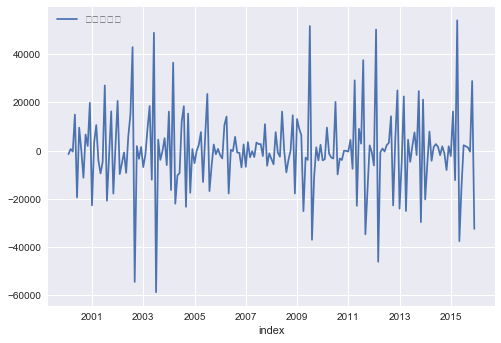

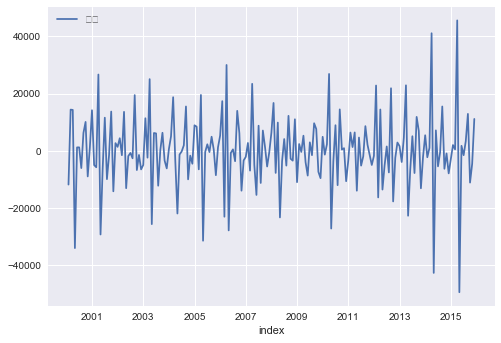

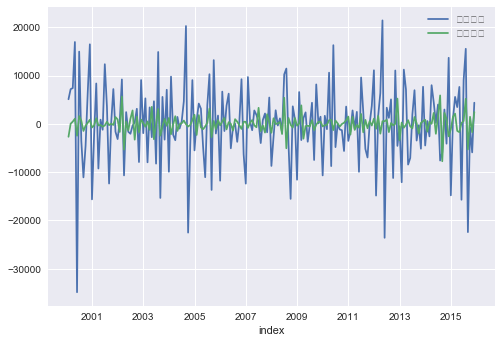

In [146]:
#差分
consumption_diff.plot()
food_diff.plot()
estate_diff.plot()
utility_diff.plot()
furniture_diff.plot()
cloth_diff.plot()
medical_diff.plot()
com_diff.plot()
edu_diff.plot()
edu_fun_diff.plot()

In [147]:
diff_data_2 = pd.concat([consumption_diff,food_diff,estate_diff,utility_diff,furniture_diff,cloth_diff,medical_diff,com_diff,edu_diff,edu_fun_diff],axis=1)

In [150]:
diff_data_2.columns = [
    'consumption'
    ,'food'
    ,'estate'
    ,'utility'
    ,'furniture'
    ,'furniture_2'
    ,'cloth'
    ,'cloth_2'
    ,'medical'
    ,'telecom'
    ,'education'
    ,'edu_fun'
    ,'edu_fun_2'
]

In [151]:
x_train = diff_data
y_train = diff_data_2

In [152]:
#天候データ
x_train = x_train.loc[:,['avg_temp','sun','avg_wind','rain_sum']]
x_train.columns = ['temp','sun','wind','rain']
#目的変数データ
y_test = y_train.loc[:,['consumption']]
#複数の目的変数データ, この処理に特に意味ないけど整理するために入れた
tar_data = tar_data

# 気温がもっとも効果ありそう
# ARIMAモデルで推定じゃ！

In [44]:
#消費支出のみでの自己相関
ts_acf = st.acf(y_test,nlags=40)
print (ts_acf)

[ 1.         -0.3780117  -0.25390004  0.03277107  0.22950429 -0.02290466
 -0.23781948  0.06674476  0.10385042  0.13280119 -0.23435538 -0.19677877
  0.45945653 -0.10550038 -0.21517809  0.05845617  0.14740541  0.04133664
 -0.22747373 -0.00472768  0.19665222  0.06548124 -0.18082151 -0.22573833
  0.43050819 -0.11362272 -0.14837514 -0.00877914  0.12995693  0.12214752
 -0.27948631  0.03829691  0.10730501  0.14927712 -0.26689704 -0.05971039
  0.32151098 -0.15705281 -0.07782269 -0.01113084  0.13267684]


In [45]:
#消費支出のみでの偏自己相関
par_ts_acf_2 = st.pacf(y_test.values.ravel(),nlags=40)
print (par_ts_acf_2)

[ 1.00000000e+00 -3.80001234e-01 -4.68663154e-01 -4.31347375e-01
 -1.58634278e-01 -7.18445556e-03 -1.84688714e-01 -1.97001823e-01
 -2.33773750e-01  8.59405187e-02  2.74619471e-02 -4.16355114e-01
  4.13931548e-03 -6.22121005e-02 -1.68529803e-01  3.26157741e-04
 -9.55304719e-02  7.29522624e-02  1.51865908e-02 -1.82006910e-01
  1.14367432e-01  1.42449180e-01  1.83315251e-01 -8.69063113e-02
  8.25582771e-02 -1.43184361e-02  3.21016073e-02 -1.22070742e-02
 -1.15464838e-01  7.08293945e-02 -1.54575325e-01 -8.42568758e-02
 -9.14169906e-02  2.23592911e-02 -1.87765325e-01 -1.16186116e-01
  5.12184956e-02 -2.13903586e-01 -8.60752480e-02 -1.09818532e-01
 -4.58058614e-02]


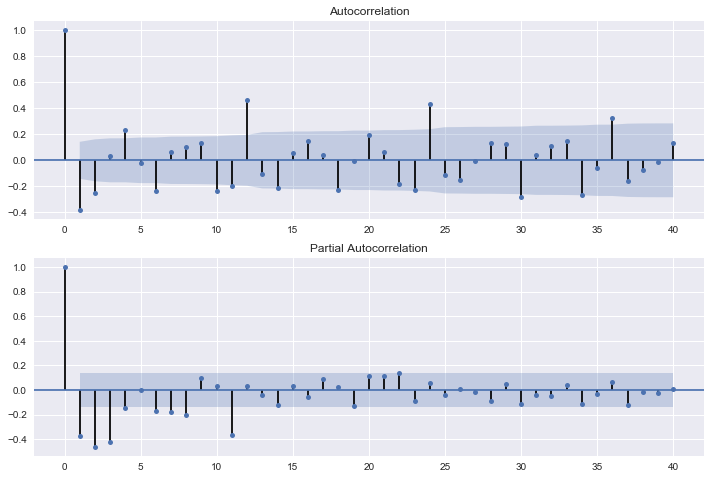

In [46]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_test.values.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_test.values.ravel(), lags=40, ax=ax2)

In [96]:
#armaの準備
arma_y_test = tar_data.loc[:,['total_consumption']]

In [97]:
#ARMAの次数推定
arima_4_1 = sm.tsa.arma_order_select_ic(y_test, ic='aic', trend='nc')
arima_4_1

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


{'aic':              0            1            2
 0          NaN  4477.689554  4479.572715
 1  4561.552176  4479.633540  4479.286147
 2  4517.503367  4469.644548  4471.626066
 3  4482.139335  4471.595376  4472.645620
 4  4480.103356  4467.398990  4469.389970, 'aic_min_order': (4, 1)}

In [98]:
arma = ARMA(y_test,order = [4,1,1]).fit(dist=False)
print (arma.params)

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


const                     -137.016297
ar.L1.total_consumption      0.081099
ar.L2.total_consumption     -0.118261
ar.L3.total_consumption      0.106270
ar.L4.total_consumption      0.256129
ma.L1.total_consumption     -1.000000
dtype: float64


/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [99]:
results = ARIMA(y_test,order = [4,1,1]).fit(dist=False)
print (results.params)

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


const                        2.801584
ar.L1.D.total_consumption   -0.806488
ar.L2.D.total_consumption   -0.792665
ar.L3.D.total_consumption   -0.523798
ar.L4.D.total_consumption   -0.140475
ma.L1.D.total_consumption   -0.999964
dtype: float64


/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


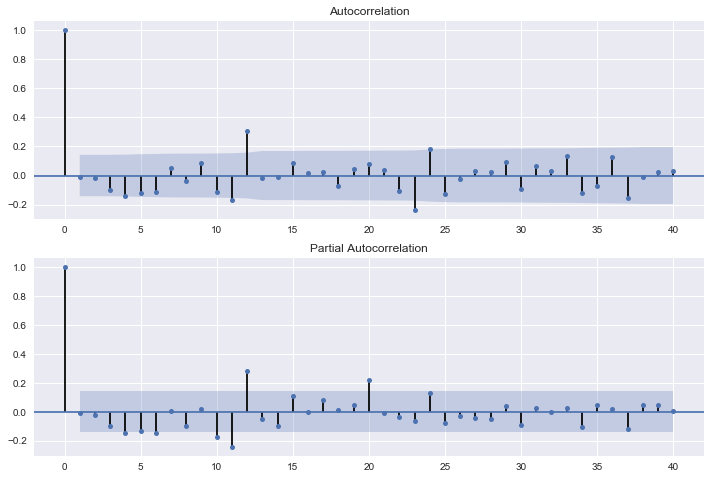

In [100]:
resid = results.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [101]:
arma.summary()

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      total_consumption   No. Observations:                  191
Model:                     ARMA(4, 1)   Log Likelihood               -2226.737
Method:                       css-mle   S.D. of innovations          27629.268
Date:                Sat, 13 Jan 2018   AIC                           4467.474
Time:                        04:18:55   BIC                           4490.240
Sample:                    02-01-2000   HQIC                          4476.695
                         - 12-01-2015                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -137.0163     51.906     -2.640      0.009    -238.751     -35.282
ar.L1.total_consumption     0.0811      0.070      1.153      0.251      -0.057       0.219
ar.L2.total_consumption    -0.1183      0.070     -1.691      0.093      -0.255       0.019
ar.L3.total_consumption     0.1063      0.070      1.517      0.131      -0.031       0.244
ar.L4.total_consumption     0.2561      0.070      3.658      0.000       0.119       0.393
ma.L1.total_consumption    -1.0000      0.017    -59.037      0.000      -1.033      -0.967
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3478           -0.0000j            1.3478           -0.0000
AR.2           -0.0511           -1.3198j            1.3208           -0.2562
AR.3           -0.0511           +1.3198j            1.3208            0.2562
AR.4           -1.6605           -0.0000j            1.6605           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [102]:
results.summary()

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.total_consumption   No. Observations:                  190
Model:                  ARIMA(4, 1, 1)   Log Likelihood               -2227.621
Method:                        css-mle   S.D. of innovations          29201.669
Date:                 Sat, 13 Jan 2018   AIC                           4469.242
Time:                         04:19:04   BIC                           4491.971
Sample:                     03-01-2000   HQIC                          4478.449
                          - 12-01-2015                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.8016     12.004      0.233      0.816     -20.726      26.329
ar.L1.D.total_consumption    -0.8065      0.072    -11.216      0.000      -0.947      -0.666
ar.L2.D.total_consumption    -0.7927      0.085     -9.376      0.000      -0.958      -0.627
ar.L3.D.total_consumption    -0.5238      0.084     -6.206      0.000      -0.689      -0.358
ar.L4.D.total_consumption    -0.1405      0.072     -1.954      0.052      -0.281       0.000
ma.L1.D.total_consumption    -1.0000      0.014    -73.158      0.000      -1.027      -0.973
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0498           -1.2696j            1.2706           -0.2438
AR.2            0.0498           +1.2696j            1.2706            0.2438
AR.3           -1.9142           -0.8635j            2.0999           -0.4326
AR.4           -1.9142           +0.8635j            2.0999            0.4326
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


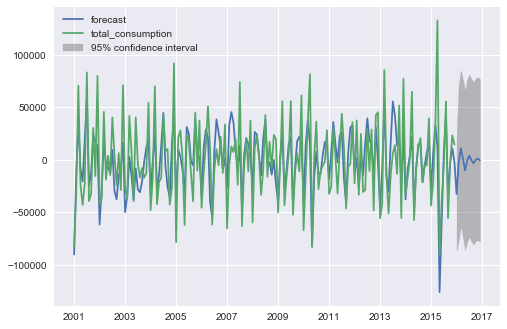

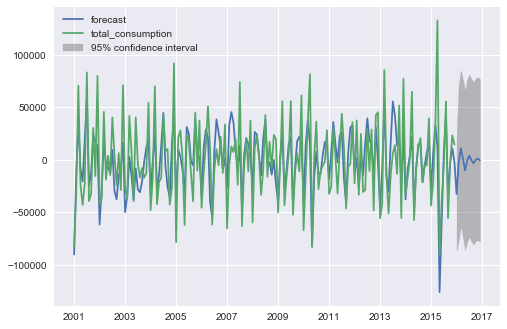

In [103]:
#ARMAの予測
arma.plot_predict('2001-01-01','2016-12-01')

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


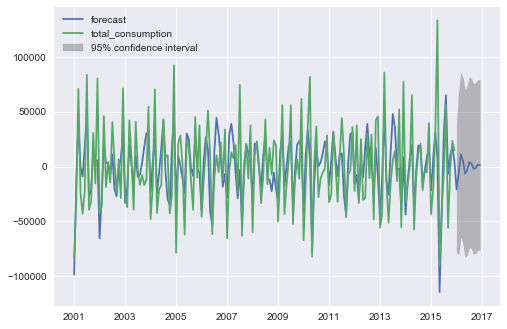

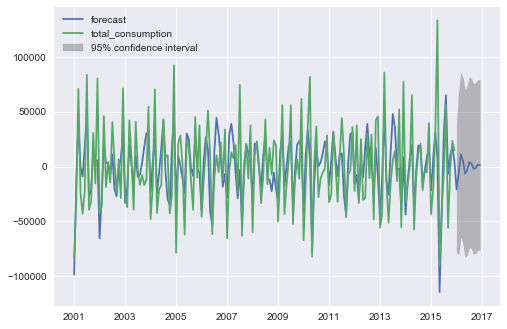

In [104]:
#ARIMAの予測
results.plot_predict('2001-01-01','2016-12-01')

# VARモデルで推測じゃ

In [124]:
#差分に対してrandom forestすることでどれが目的変数に影響あるかを調べる
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(x_train, y_test)
print('Training done using Random Forest')

Training done using Random Forest


/Users/Taishi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


/Users/Taishi/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


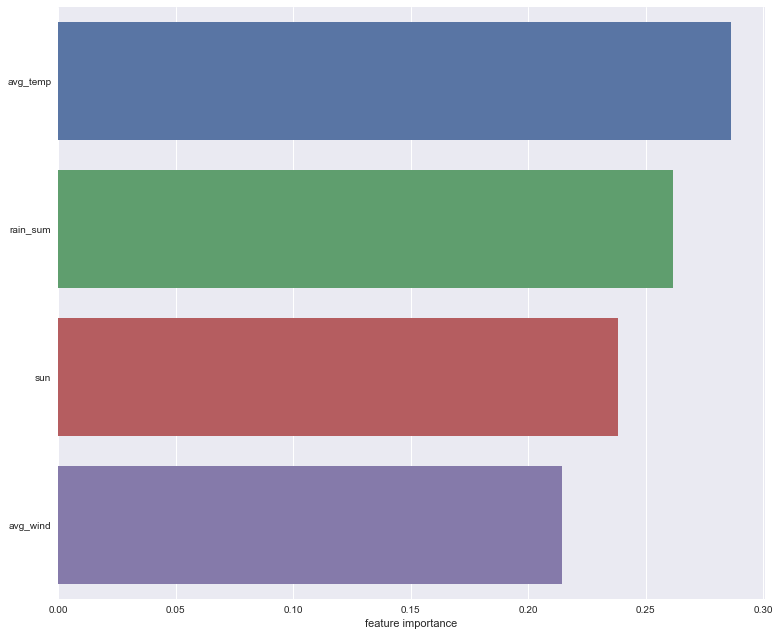

In [125]:
#plot
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=x_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [126]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [153]:
var_data = pd.concat([x_train,y_test],axis=1)

In [154]:
model = VAR(var_data)

In [155]:
model.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         39.91        40.00    2.150e+17        39.95
1         38.14        38.69    3.682e+16        38.36
2         37.58        38.58    2.104e+16        37.99
3         36.73       38.17*    8.934e+15        37.31
4         36.40        38.29    6.491e+15        37.17
5         36.16        38.50    5.129e+15        37.11
6         35.94        38.73    4.120e+15       37.07*
7         35.88        39.12    3.923e+15        37.19
8         35.58        39.27    2.953e+15        37.08
9         35.48        39.62    2.726e+15        37.16
10        35.45        40.05    2.719e+15        37.32
11       35.21*        40.25   2.188e+15*        37.25
12        35.30        40.79    2.487e+15        37.53
13        35.33        41.28    2.679e+15        37.74
14        35.37        41.77    2.938e+15        37.97
15        

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


{'aic': 11, 'bic': 3, 'fpe': 11, 'hqic': 6}

In [156]:
#モデルはaic
var_result = model.fit(maxlags=15, ic='aic')

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


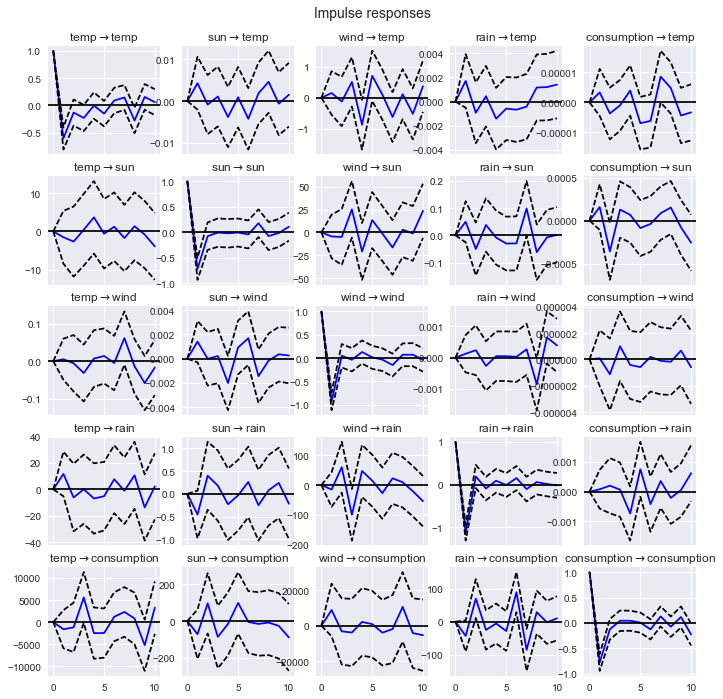

In [157]:
irf = var_result.irf(10)
irf.plot(orth=False)